# Titanic data set

<img src="data/titanic.jpg" width=300>

Reference: https://medium.com/@sayahfares19/hands-on-data-analysis-on-titanic-dataset-using-pandas-646a41edf81

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="ticks", font='Hiragino Sans')
%matplotlib inline

## Read the data

In [2]:
titanic_df = pd.read_csv("data/titanic.csv")

In [3]:
titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
null_val = titanic_df.isnull().sum()
null_val  # pandas.core.series.Series object

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

## Who were the passengers on the Titanic?

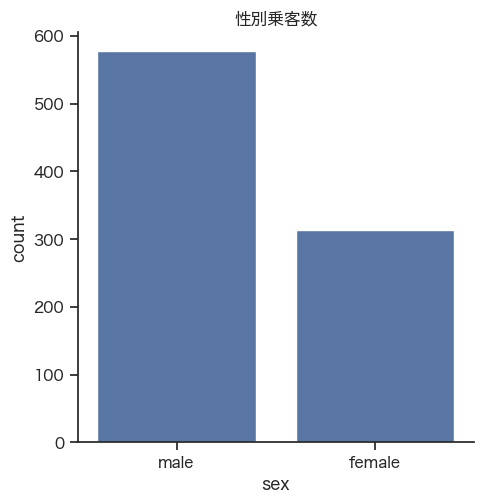

In [6]:
sns.catplot(x='sex', data=titanic_df, kind='count').set(title="性別乗客数")

[Text(0.5, 1.0, '年齢別分布')]

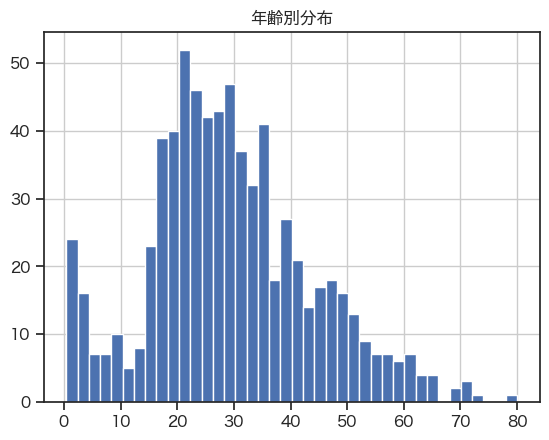

In [7]:
titanic_df.age.hist(bins=40).set(title="年齢別分布")

In [8]:
percent = 100 * null_val/len(titanic_df)
missing = pd.concat([null_val, percent], axis=1)
missing = missing.rename(columns = {0 : 'Missing', 1 : '%'})
missing

,Missing,%
survived,0,0.000000
pclass,0,0.000000
name,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000
fare,0,0.000000
cabin,687,77.104377


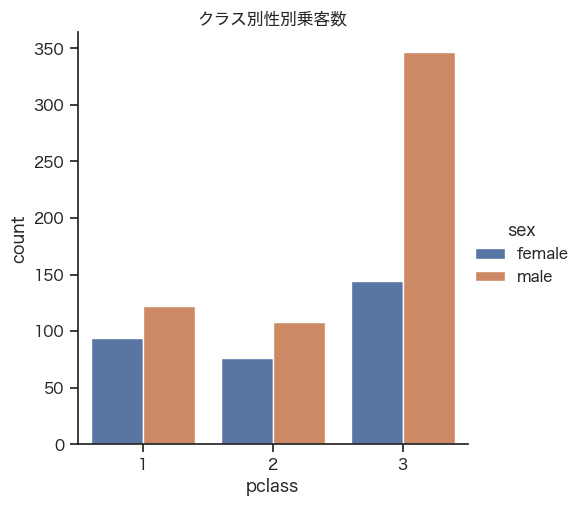

In [9]:
rel = sns.catplot(x='pclass', data=titanic_df, hue='sex', kind='count').set(title="クラス別性別乗客数")

In [10]:
titanic_df['person'] = titanic_df.sex
titanic_df.loc[titanic_df['age'] < 16, 'person'] = 'child'

In [11]:
titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,person
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [12]:
titanic_df.person.unique()

array(['male', 'female', 'child'], dtype=object)

In [13]:
titanic_df.person.value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

In [14]:
titanic_df.age.mean()

29.69911764705882

## What deck were the passengers on and how does that relate to their class?

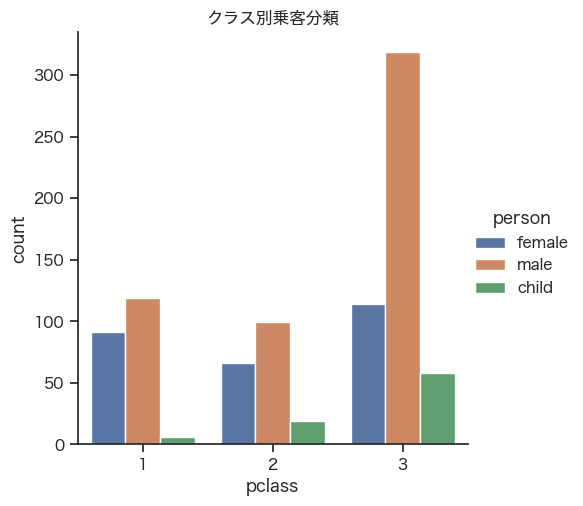

In [15]:
sns.catplot(x='pclass', data=titanic_df, hue='person', kind='count').set(title="クラス別乗客分類")

In [16]:
deck = titanic_df['cabin'].dropna()
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: cabin, Length: 204, dtype: object

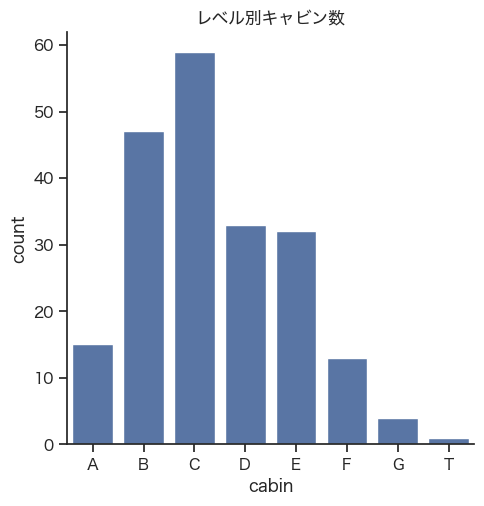

In [17]:
levels = []
for level in deck:
    levels.append(level[0])
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['cabin']
cabin_df.sort_values(by='cabin', inplace=True)
sns.catplot(x='cabin', data=cabin_df, kind='count').set(title="レベル別キャビン数")

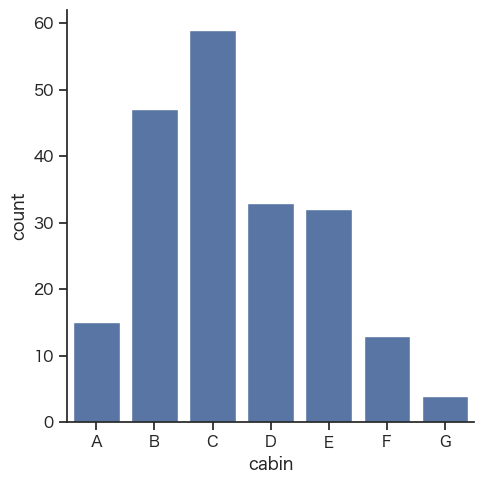

In [18]:
cabin_df = cabin_df[cabin_df.cabin != 'T']
sns.catplot(x='cabin', data=cabin_df, kind='count') 

## Where did the passengers come from?

In [19]:
titanic_df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Cherbourg, Queenstown and Southhampton.

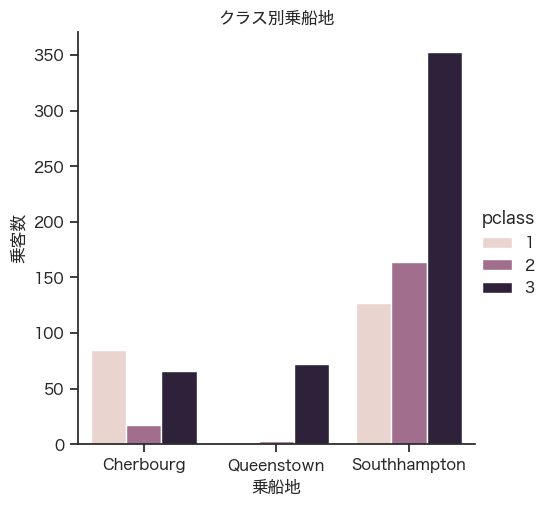

In [20]:
fg = sns.catplot(x='embarked', data=titanic_df, hue='pclass', kind='count', order=['C', 'Q', 'S'])
fg.set(title="クラス別乗船地", xlabel="乗船地", ylabel="乗客数")
fg.set_xticklabels(["Cherbourg", "Queenstown", "Southhampton"])

In [21]:
titanic_df['alone'] = titanic_df.sibsp + titanic_df.parch
titanic_df['alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: alone, Length: 891, dtype: int64

In [22]:
titanic_df.loc[titanic_df['alone'] > 0, 'alone'] = 'with family'
titanic_df.loc[titanic_df['alone'] == 0, 'alone'] = 'alone'
titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,person,alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


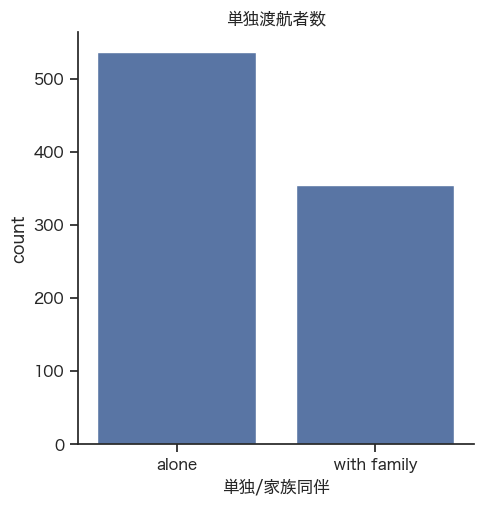

In [23]:
sns.catplot(titanic_df, x='alone', kind='count', order=['alone', 'with family']).set(title="単独渡航者数", xlabel="単独/家族同伴")

In [24]:
titanic_df['survivor'] = titanic_df.survived.map({0:'No', 1:'Yes'})
titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,person,alone,survivor
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,No
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,Yes
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,Yes
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,Yes
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,No


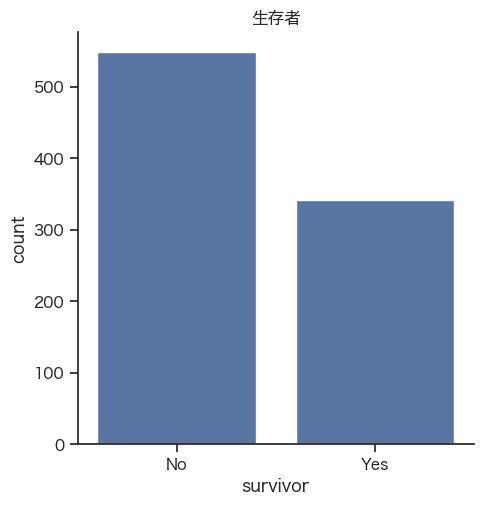

In [25]:
sns.catplot(titanic_df, x='survivor', kind='count').set(title="生存者")

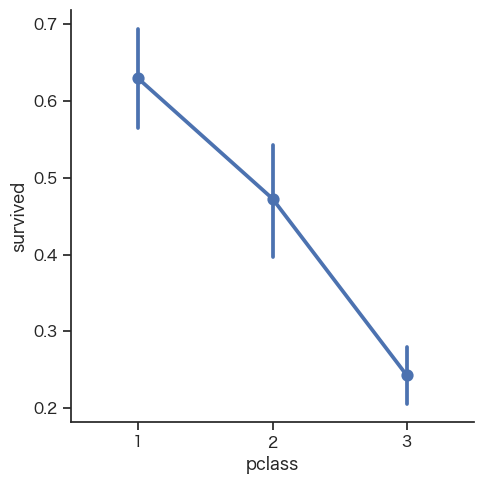

In [26]:
sns.catplot(titanic_df, x='pclass', y='survived', kind='point')

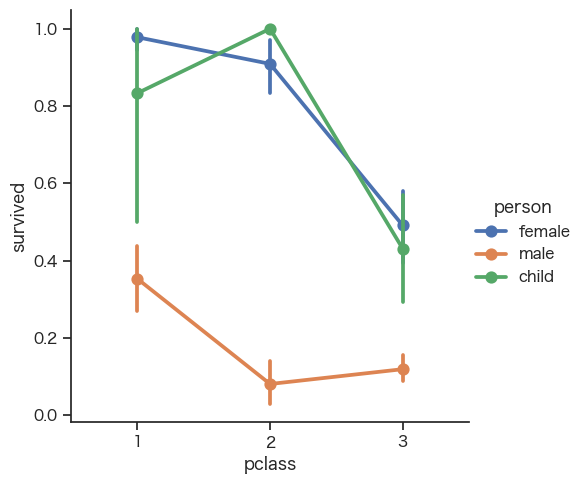

In [27]:
sns.catplot(data=titanic_df, x='pclass', y='survived', kind='point', hue='person')

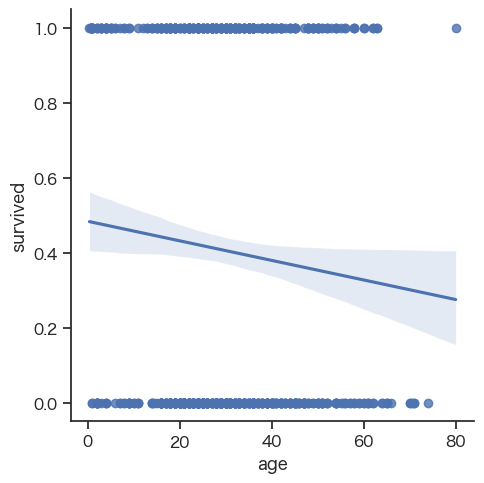

In [28]:
sns.lmplot(titanic_df, x='age', y='survived')

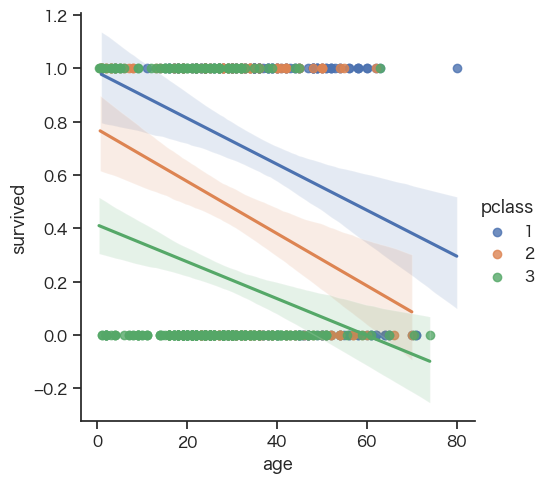

In [29]:
sns.lmplot(titanic_df, x='age', y='survived', hue='pclass')

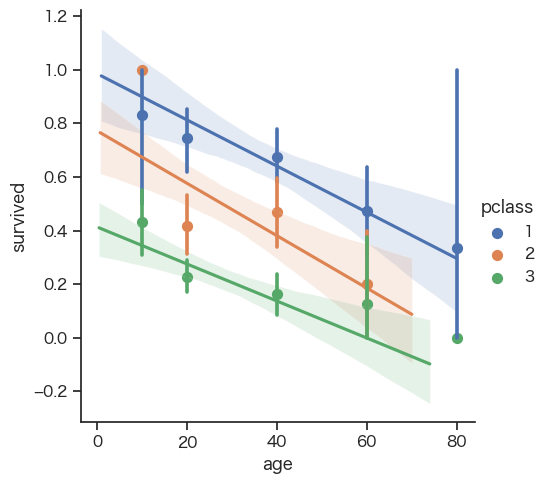

In [30]:
generations = [10, 20, 40, 60, 80]
sns.lmplot(data=titanic_df, x ='age', y='survived', hue='pclass', x_bins=generations)

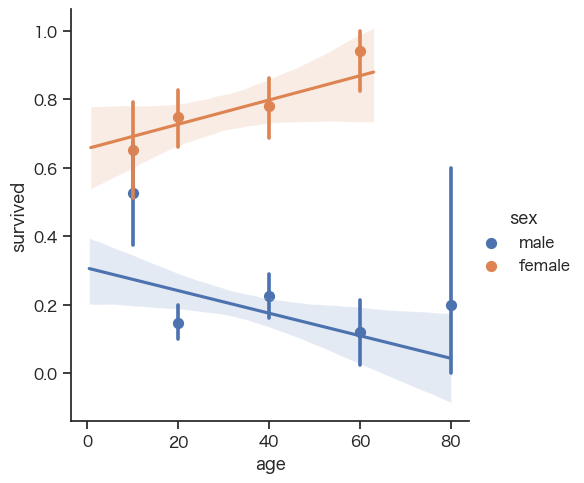

In [31]:
sns.lmplot(data=titanic_df, x ='age', y='survived', hue='sex', x_bins=generations)